### Q. 로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망 모델 개발
- 데이터 소스 : from keras.datasets import reuters
- 데이터 및 레이블 벡터 변환 : 주어진 사용자 함수 참조
- 모델 구성 : 2개 은닉층(64개 유닛), 1개 출력층
- 검증 : 훈련 데이터에서 1000개 분리하여 검증 데이터로 사용
- 시각화 : 정확도와 손실율 곡선을 비교 시사점 도출

In [5]:
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 10000

# 특성과 타깃 데이터를 로드합니다.
data = reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data

# 특성 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 타깃 벡터를 원-핫 인코딩하여 타깃 행렬을 만듭니다.
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=100,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=100, activation="relu"))

# 소프트맥스 활성화 함수를 사용하는 완전 연결 층을 추가합니다.
# 다중 분류 문제이기 때문에 출력층에 소프트맥스 활성화 함수와 46개의 유닛을
# 하나씩 사용
network.add(layers.Dense(units=46, activation="softmax"))

# 신경망의 모델 설정을 완료합니다.
# 다중 분류에 맞은 손실 함수인 범주형 크로스엔트로피를 사용하기 위해
# categorical_ crossentropy로 설정
network.compile(loss="categorical_crossentropy", 
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃
                      epochs=10, 
                      verbose=1, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

# 훈련 손실과 테스트 손실의 기록을 저장합니다.
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(training_accuracy) + 1)

print('\n')
print('모델 성능 :')
print(network.evaluate(features_test, target_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 2s 219us/step - loss: 1.5143 - accuracy: 0.6766 - val_loss: 1.1080 - val_accuracy: 0.7435
Epoch 2/10
8982/8982 [==============================] - 2s 187us/step - loss: 0.7482 - accuracy: 0.8382 - val_loss: 0.9240 - val_accuracy: 0.7930
Epoch 3/10
8982/8982 [==============================] - 2s 189us/step - loss: 0.4481 - accuracy: 0.9035 - val_loss: 0.9246 - val_accuracy: 0.7983
Epoch 4/10
8982/8982 [==============================] - 2s 185us/step - loss: 0.3008 - accuracy: 0.9341 - val_loss: 0.9579 - val_accuracy: 0.8054
Epoch 5/10
8982/8982 [==============================] - 2s 186us/step - loss: 0.2372 - accuracy: 0.9458 - val_loss: 1.0142 - val_accuracy: 0.8014
Epoch 6/10
8982/8982 [==============================] - 2s 184us/step - loss: 0.2004 - accuracy: 0.9480 - val_loss: 1.0921 - val_accuracy: 0.7916
Epoch 7/10
8982/8982 [==============================] - 2s 192us/step - loss

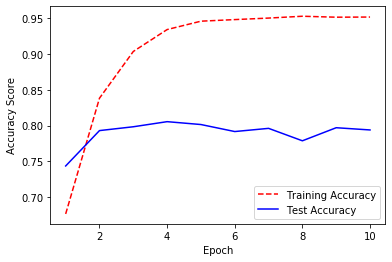

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# 시각화
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()
plt.close()

In [ ]:
# 사용자 함수

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 2s 1us/step


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [3]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(training_accuracy) + 1)

print('\n')
print('모델 성능 :')
print(model.evaluate(x_test, one_hot_test_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 96us/step - loss: 2.4971 - accuracy: 0.5293 - val_loss: 1.6688 - val_accuracy: 0.6430
Epoch 2/10
7982/7982 [==============================] - 1s 88us/step - loss: 1.3980 - accuracy: 0.7005 - val_loss: 1.3011 - val_accuracy: 0.7210
Epoch 3/10
7982/7982 [==============================] - 1s 85us/step - loss: 1.0605 - accuracy: 0.7761 - val_loss: 1.1471 - val_accuracy: 0.7460
Epoch 4/10
7982/7982 [==============================] - 1s 88us/step - loss: 0.8367 - accuracy: 0.8281 - val_loss: 1.0503 - val_accuracy: 0.7730
Epoch 5/10
7982/7982 [==============================] - 1s 89us/step - loss: 0.6682 - accuracy: 0.8609 - val_loss: 0.9832 - val_accuracy: 0.7920
Epoch 6/10
7982/7982 [==============================] - 1s 88us/step - loss: 0.5319 - accuracy: 0.8900 - val_loss: 0.9207 - val_accuracy: 0.8040
Epoch 7/10
7982/7982 [==============================] - 1s 89us/step - loss: 0.427

In [11]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 117us/step


[1.006892014908557, 0.7876224517822266]